# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline,Pipeline
%matplotlib inline

# Load the data

In [2]:
df = pd.read_csv("C:\\Users\Swaroop\Desktop\Data_Projects\\bottle.csv",low_memory = False)
print("Data read into dataframe!")

Data read into dataframe!


# Initial Analysis

In [3]:
df.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,NaN,25.651,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,NaN,25.658,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,NaN,25.682,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,NaN,25.710,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,NaN,25.801,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check the shape of data

In [4]:
df.shape

(864863, 74)

### Check the column headings

In [5]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

### Check if database consists any missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

### Check the percentage of missing values in each column

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Cst_Cnt                 0.000000
Btl_Cnt                 0.000000
Sta_ID                  0.000000
Depth_ID                0.000000
Depthm                  0.000000
T_degC                  1.267600
Salnty                  5.475318
O2ml_L                 19.501586
STheta                  6.092179
O2Sat                  23.540029
Oxy_µmol/Kg            23.540723
BtlNum                 86.279099
RecInd                  0.000000
T_prec                  1.267600
T_qual                 97.325935
S_prec                  5.475318
S_qual                 91.338050
P_qual                 22.096910
O_qual                 78.646791
SThtaq                 92.389199
O2Satq                 74.817168
ChlorA                 73.952869
Chlqua                 26.096272
Phaeop                 73.952984
Phaqua                 26.095809
PO4uM                  52.210119
PO4q                   47.762131
SiO3uM                 59.058140
SiO3qu                 40.930991
NO2uM                  60.967691
          

### Remove columns with more than 15 percent null values

In [8]:
thresh = len(df) * .85
df.dropna(thresh = thresh, axis = 1, inplace = True)

### Recheck percent missing

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Cst_Cnt       0.000000
Btl_Cnt       0.000000
Sta_ID        0.000000
Depth_ID      0.000000
Depthm        0.000000
T_degC        1.267600
Salnty        5.475318
STheta        6.092179
RecInd        0.000000
T_prec        1.267600
S_prec        5.475318
NH3q          6.540227
C14A1q        1.879835
C14A2q        1.877754
DarkAq        2.823915
MeanAq        2.824031
R_Depth       0.000000
R_TEMP        1.267600
R_POTEMP      5.324196
R_SALINITY    5.475318
R_SIGMA       6.111488
R_SVA         6.101660
R_DYNHT       5.394727
R_PRES        0.000000
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 24 columns):
Cst_Cnt       864863 non-null int64
Btl_Cnt       864863 non-null int64
Sta_ID        864863 non-null object
Depth_ID      864863 non-null object
Depthm        864863 non-null int64
T_degC        853900 non-null float64
Salnty        817509 non-null float64
STheta        812174 non-null float64
RecInd        864863 non-null int64
T_prec        853900 non-null float64
S_prec        817509 non-null float64
NH3q          808299 non-null float64
C14A1q        848605 non-null float64
C14A2q        848623 non-null float64
DarkAq        840440 non-null float64
MeanAq        840439 non-null float64
R_Depth       864863 non-null float64
R_TEMP        853900 non-null float64
R_POTEMP      818816 non-null float64
R_SALINITY    817509 non-null float64
R_SIGMA       812007 non-null float64
R_SVA         812092 non-null float64
R_DYNHT       818206 non-null float64
R_PRES        864863 non-

### Simple Linear Regression

### Create a subset of the database to reduce processing times

In [11]:
df2 = df[:][:1000]
df2.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,25.651,7,2.0,...,9.0,9.0,30.0,10.45,10.45,33.431,25.65,233.5,0.07,30
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,25.658,3,2.0,...,9.0,9.0,39.0,10.45,10.45,33.440,25.65,233.0,0.09,39
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,25.682,7,2.0,...,9.0,9.0,50.0,10.24,10.23,33.424,25.68,231.0,0.11,50
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,25.710,3,2.0,...,9.0,9.0,58.0,10.06,10.05,33.420,25.71,228.5,0.13,58
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,25.801,7,2.0,...,9.0,9.0,75.0,9.86,9.85,33.494,25.80,220.1,0.17,75


### Check the subset for missing values

In [12]:
percent_missing2 = df2.isnull().sum() * 100 / len(df2)
percent_missing2

Cst_Cnt       0.0
Btl_Cnt       0.0
Sta_ID        0.0
Depth_ID      0.0
Depthm        0.0
T_degC        0.2
Salnty        3.0
STheta        3.2
RecInd        0.0
T_prec        0.2
S_prec        3.0
NH3q          0.0
C14A1q        0.0
C14A2q        0.0
DarkAq        0.0
MeanAq        0.0
R_Depth       0.0
R_TEMP        0.2
R_POTEMP      3.8
R_SALINITY    3.0
R_SIGMA       5.5
R_SVA         5.5
R_DYNHT       2.7
R_PRES        0.0
dtype: float64

### Fill the missing values

In [13]:
df2 = df2.fillna(df2.mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
Cst_Cnt       1000 non-null int64
Btl_Cnt       1000 non-null int64
Sta_ID        1000 non-null object
Depth_ID      1000 non-null object
Depthm        1000 non-null int64
T_degC        1000 non-null float64
Salnty        1000 non-null float64
STheta        1000 non-null float64
RecInd        1000 non-null int64
T_prec        1000 non-null float64
S_prec        1000 non-null float64
NH3q          1000 non-null float64
C14A1q        1000 non-null float64
C14A2q        1000 non-null float64
DarkAq        1000 non-null float64
MeanAq        1000 non-null float64
R_Depth       1000 non-null float64
R_TEMP        1000 non-null float64
R_POTEMP      1000 non-null float64
R_SALINITY    1000 non-null float64
R_SIGMA       1000 non-null float64
R_SVA         1000 non-null float64
R_DYNHT       1000 non-null float64
R_PRES        1000 non-null int64
dtypes: float64(17), int64(5), object(2)
m

### Histograms

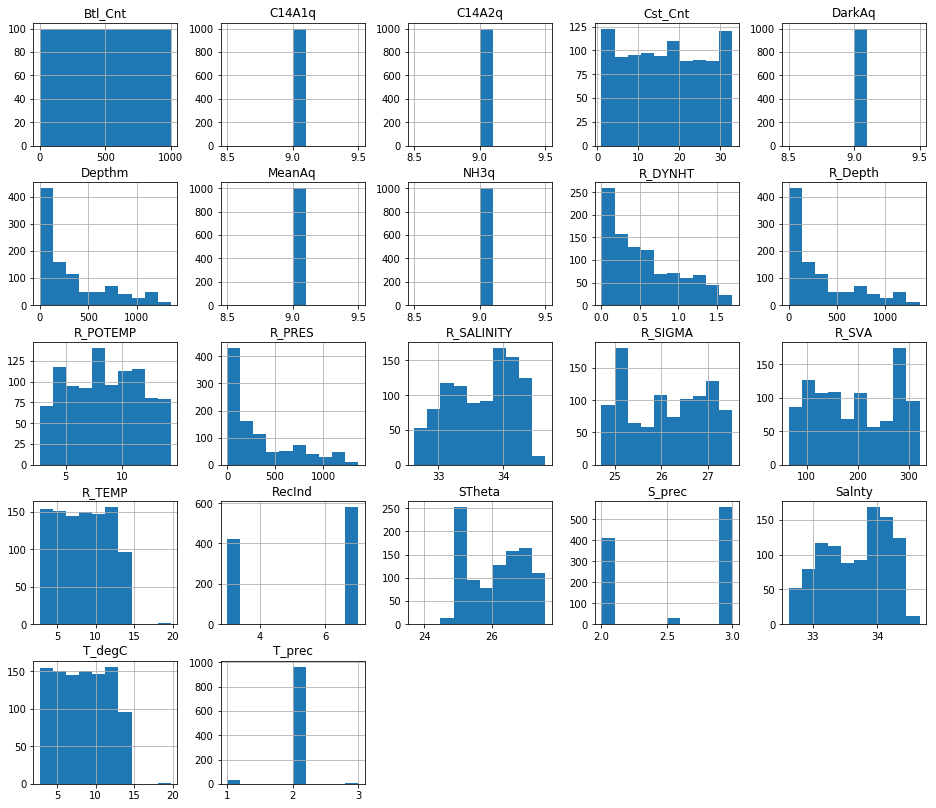

In [14]:
df2.hist(figsize = (16,14))
plt.show()

# Machine Learning

## Simple Linear Regression

### Seperate the features and target variable

In [15]:
X = df2[["Salnty"]]
y = df2[["T_degC"]]
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 1) (800, 1)
Test set: (200, 1) (200, 1)


### Scale the data

In [17]:
sdc = StandardScaler()
X_train = sdc.fit_transform(X_train)
X_test = sdc.fit_transform(X_test)

### Simple Linear Regression Initialize

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_hat = lr.predict(X_test)
y_hat[0:5]  

array([[ 5.10476739],
       [10.79448247],
       [10.66575588],
       [ 7.85951632],
       [12.82836252]])

### Display the intercept and co-efficient

In [20]:
lr.intercept_

array([8.39930914])

In [21]:
lr.coef_

array([[-2.66292264]])

### Model accuracy and R squared value

In [22]:
print("Linear Regression Model accuracy: " +"{:.2%}".format(lr.score(X_test, y_test)))

Linear Regression Model accuracy: 68.10%


In [23]:
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat)))

R_Square Score: 0.681


### MAE, MSE and RMSE for Simple Linear Regression

In [24]:
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat))))

Mean Absolute Error: 1.416
Mean Squared Error: 3.58
RMSE: 1.892


### Plot the best fit line (SNS Library plot)

(0, 20.635001751148106)

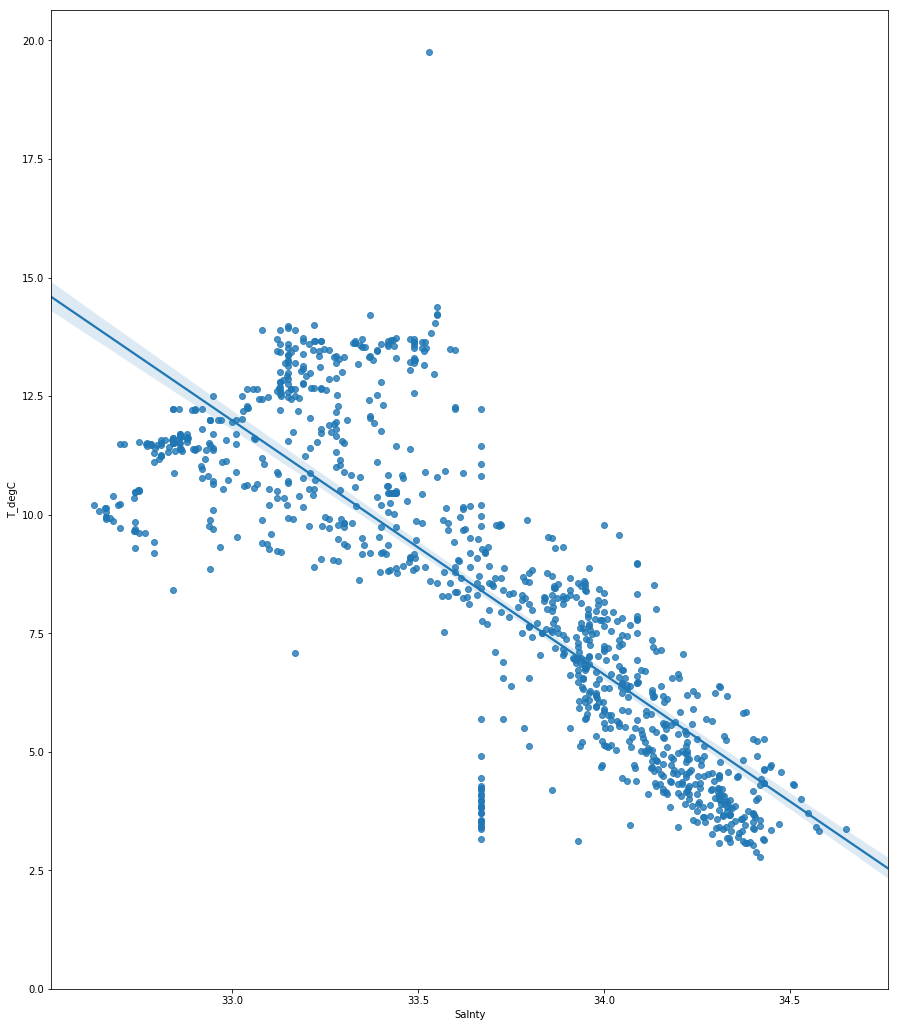

In [70]:
width = 15
height = 18
plt.figure(figsize=(width, height))
sns.regplot(x=df2["Salnty"], y=df2["T_degC"], data=df2)
plt.ylim(0,)

### Plot the best fit line (matplotlib plot)

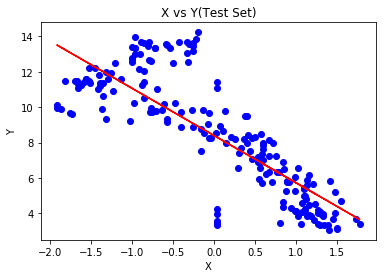

In [26]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,lr.predict(X_test),color='red')
plt.title('X vs Y(Test Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Regression using Polynomial Features

In [27]:
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr
print(X_train_pr.shape)
print(X_test_pr.shape)

(800, 4)
(200, 4)


### Initialize

In [28]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_hat_poly = lr_poly.predict(X_test_pr)
y_hat_poly[0:5]

array([[ 4.48483015],
       [11.78699953],
       [11.71363774],
       [ 8.33527062],
       [11.30019929]])

In [30]:
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat_poly)))

R_Square Score: 0.7763


### MAE, MSE and RMSE for Non-Linear Regression model

In [31]:
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat_poly)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat_poly)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat_poly))))

Mean Absolute Error: 1.124
Mean Squared Error: 2.511
RMSE: 1.585


### Define a function to plot the Non-Linear Regression line

In [32]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    
    plt.ylabel('Price')
    plt.legend()

In [33]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

### Visualization

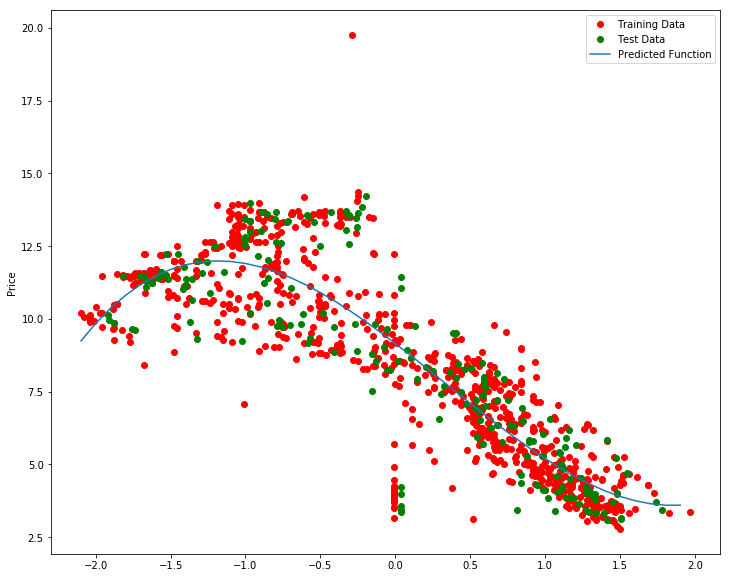

In [34]:
PollyPlot(X_train, X_test, y_train, y_test, lr_poly,pr)

In [35]:
X = df2[["Salnty"]]
y = df2[["T_degC"]]
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 1) (800, 1)
Test set: (200, 1) (200, 1)


### Create a Pipeline to streamline the entire process

In [37]:
Operations =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures()), ('linear',LinearRegression())]

In [38]:
pipe = Pipeline(Operations)
pipe.fit(X_train,y_train)
y_hat_pipe = pipe.predict(X_test)



### Display the parameters for the pipeline

In [39]:
sorted(pipe.get_params().keys())

['linear',
 'linear__copy_X',
 'linear__fit_intercept',
 'linear__n_jobs',
 'linear__normalize',
 'memory',
 'polynomial',
 'polynomial__degree',
 'polynomial__include_bias',
 'polynomial__interaction_only',
 'scale',
 'scale__copy',
 'scale__with_mean',
 'scale__with_std',
 'steps']

### GridSearch CV using 10 folds

In [40]:
parameters = {'polynomial__degree': np.arange(5)}

pipe_grid = GridSearchCV(pipe, param_grid = parameters, cv=10,n_jobs = -1)
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'polynomial__degree': array([0, 1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Obtain the best parameters

In [41]:
print(pipe_grid.best_params_)

{'polynomial__degree': 3}


### Cross Validation Score

In [42]:
Rcross = cross_val_score(pipe, X, y, cv=10)

In [43]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7411360367243345 and the standard deviation is 0.15632166215805596


In [44]:
-1 * cross_val_score(pipe,X, y,cv=10,scoring='neg_mean_squared_error')

array([1.65323064, 1.40905334, 1.48620657, 1.01784319, 0.62977105,
       2.70299074, 5.71261877, 1.61551808, 6.90181317, 4.64129707])

### Redefine the pipeline with best parameters

In [45]:
Operations =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=3)), ('linear',LinearRegression())]

In [46]:
pipe = Pipeline(Operations)
pipe.fit(X_train,y_train)
y_hat_pipe = pipe.predict(X_test)

### Display the metrics

In [47]:
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat_pipe)))

R_Square Score: 0.778


### MAE, MSE and RMSE for Pipeline

In [48]:
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat_pipe)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat_pipe)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat_pipe))))

Mean Absolute Error: 1.124
Mean Squared Error: 2.492
RMSE: 1.578


### Display the correlations

In [49]:
df2.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999404,-0.020723,0.169357,0.112236,-0.069159,-0.004892,0.001412,-0.023432,NaN,...,NaN,NaN,-0.020723,0.169357,0.200152,0.112236,-0.072459,0.075238,-0.045360,-0.020921
Btl_Cnt,0.999404,1.000000,0.008005,0.139931,0.139113,-0.040383,0.001056,0.009965,-0.018346,NaN,...,NaN,NaN,0.008005,0.139931,0.171771,0.139113,-0.044031,0.046911,-0.015906,0.007798
Depthm,-0.020723,0.008005,1.000000,-0.888867,0.790111,0.832737,0.164855,0.158206,0.129543,NaN,...,NaN,NaN,1.000000,-0.888867,-0.837887,0.790111,0.820206,-0.815527,0.921462,0.999999
T_degC,0.169357,0.139931,-0.888867,1.000000,-0.830333,-0.949300,-0.174082,-0.206060,-0.147152,NaN,...,NaN,NaN,-0.888867,1.000000,0.962748,-0.830333,-0.932000,0.931644,-0.897630,-0.888607
Salnty,0.112236,0.139113,0.790111,-0.830333,1.000000,0.945493,0.147737,0.200632,0.149827,NaN,...,NaN,NaN,0.790111,-0.830333,-0.849965,1.000000,0.941163,-0.940608,0.871719,0.789659
STheta,-0.069159,-0.040383,0.832737,-0.949300,0.945493,1.000000,0.154751,0.218682,0.156940,NaN,...,NaN,NaN,0.832737,-0.949300,-0.960123,0.945493,0.986250,-0.986170,0.917134,0.832283
RecInd,-0.004892,0.001056,0.164855,-0.174082,0.147737,0.154751,1.000000,0.206303,0.986051,NaN,...,NaN,NaN,0.164855,-0.174082,-0.160666,0.147737,0.160651,-0.159909,0.172811,0.164740
T_prec,0.001412,0.009965,0.158206,-0.206060,0.200632,0.218682,0.206303,1.000000,0.208012,NaN,...,NaN,NaN,0.158206,-0.206060,-0.201981,0.200632,0.214798,-0.213926,0.204373,0.157950
S_prec,-0.023432,-0.018346,0.129543,-0.147152,0.149827,0.156940,0.986051,0.208012,1.000000,NaN,...,NaN,NaN,0.129543,-0.147152,-0.156928,0.149827,0.162923,-0.162171,0.166937,0.129369
NH3q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the features with very high correlation

In [50]:
corr_matrix = df2.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol

Salnty      R_SALINITY    1.000000
T_degC      R_TEMP        1.000000
Depthm      R_Depth       1.000000
            R_PRES        0.999999
R_Depth     R_PRES        0.999999
R_SIGMA     R_SVA         0.999910
Cst_Cnt     Btl_Cnt       0.999404
STheta      R_SIGMA       0.986250
            R_SVA         0.986170
RecInd      S_prec        0.986051
R_POTEMP    R_SIGMA       0.968224
            R_SVA         0.967819
T_degC      R_POTEMP      0.962748
R_TEMP      R_POTEMP      0.962748
STheta      R_POTEMP      0.960123
T_degC      STheta        0.949300
STheta      R_TEMP        0.949300
Salnty      STheta        0.945493
STheta      R_SALINITY    0.945493
R_SALINITY  R_SIGMA       0.941163
Salnty      R_SIGMA       0.941163
            R_SVA         0.940608
R_SALINITY  R_SVA         0.940608
R_TEMP      R_SIGMA       0.932000
T_degC      R_SIGMA       0.932000
            R_SVA         0.931644
R_TEMP      R_SVA         0.931644
R_POTEMP    R_DYNHT       0.924794
R_Depth     R_DYNHT 

## Multiple Linear Regression

### Seperate the features and target variable

In [51]:
X2 = df2[["Salnty","STheta","R_SIGMA","R_POTEMP"]]
y = df2[["T_degC"]]

### Display the shape

In [52]:
print(X2.shape)
print(y.shape)

(1000, 4)
(1000, 1)


### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split( X2, y, test_size = 0.2, random_state = 42)
print ('Train set:', X2_train.shape,  y_train.shape)
print ('Test set:', X2_test.shape,  y_test.shape)


Train set: (800, 4) (800, 1)
Test set: (200, 4) (200, 1)


### Scale the data

In [54]:
sdc = StandardScaler()
X2_train = sdc.fit_transform(X2_train)
X2_test = sdc.fit_transform(X2_test)

### Initialize

In [55]:
mlr = LinearRegression()
mlr.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
y_hat_mlr = mlr.predict(X2_test)
y_hat_mlr[0:5]  

array([[ 4.52024857],
       [12.7963639 ],
       [11.11789603],
       [ 8.03150582],
       [10.85969473]])

### Display the Intercepts and Coefficients

In [57]:
mlr.intercept_

array([8.39930914])

In [58]:
mlr.coef_

array([[ 0.83389047, -3.54019359,  1.60616233,  1.95664699]])

### Metrics

In [59]:
print("Multiple Linear Regression Model accuracy: " +"{:.2%}".format(mlr.score(X2_test, y_test)))
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat_mlr)))

Multiple Linear Regression Model accuracy: 93.31%
R_Square Score: 0.9331


### MAE, MSE and RMSE for Multiple Linear Regression model

In [60]:
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat_mlr)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat_mlr)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat_mlr))))

Mean Absolute Error: 0.3755
Mean Squared Error: 0.7506
RMSE: 0.8664


### Polynomial Features

In [61]:
pr = PolynomialFeatures(degree=2)
X2_train_pr = pr.fit_transform(X2_train)
X2_test_pr = pr.fit_transform(X2_test)
pr
print(X2_train_pr.shape)
print(X2_test_pr.shape)

(800, 15)
(200, 15)


In [62]:
mlr_poly = LinearRegression()
mlr_poly.fit(X2_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
y_hat_mlr_poly = mlr_poly.predict(X2_test_pr)
y_hat_mlr_poly[0:5]

array([[ 4.5690707 ],
       [12.76443268],
       [10.98101076],
       [ 7.9668036 ],
       [10.95331412]])

### Metrics for evaluation

In [64]:
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat_mlr_poly)))
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat_mlr_poly)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat_mlr_poly)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat_mlr_poly))))

R_Square Score: 0.9355
Mean Absolute Error: 0.3663
Mean Squared Error: 0.7234
RMSE: 0.8505


### Create a pipeline to streamline the process

In [65]:
Operations2 =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures()), ('linear',LinearRegression())]

mlr_pipe = Pipeline(Operations2)
mlr_pipe.fit(X2_train,y_train)
y_hat_mlr_pipe = mlr_pipe.predict(X2_test)


### Pipeline Metrics for evaluation

In [66]:
print("R_Square Score: " +"{:.4}".format(r2_score(y_test, y_hat_mlr_pipe)))
print("Mean Absolute Error: " +"{:.4}".format(mean_absolute_error(y_test, y_hat_mlr_pipe)))
print("Mean Squared Error: " +"{:.4}".format(mean_squared_error(y_test, y_hat_mlr_pipe)))
print("RMSE: " +"{:.4}".format(np.sqrt(mean_squared_error(y_test, y_hat_mlr_pipe))))

R_Square Score: 0.9355
Mean Absolute Error: 0.3663
Mean Squared Error: 0.7234
RMSE: 0.8505


# Comparison Of Models

### Linear Regression Results

In [67]:
Data1 = {'Simple Linear Regression':  ['8.399', '-2.662','68.10','0.681','1.416','3.58','1.892'],
        'Multiple Linear Regression': ['8.399', "0.83389047, -3.54019359,  1.60616233,  1.95664699",'93.31','0.9331','0.3755','0.7506','0.8664'],
         'Metrics':["Intercept","Co-efficients","Accuracy","R-Squared","MAE","MSE","RMSE"]}

tab = pd.DataFrame (Data1, columns = ['Simple Linear Regression','Multiple Linear Regression','Metrics'])
tab.set_index("Metrics",inplace = True)
tab

,Simple Linear Regression,Multiple Linear Regression
Metrics,,
Intercept,8.399,8.399
Co-efficients,-2.662,"0.83389047, -3.54019359, 1.60616233, 1.95664699"
Accuracy,68.10,93.31
R-Squared,0.681,0.9331
MAE,1.416,0.3755
MSE,3.58,0.7506
RMSE,1.892,0.8664


### Non-Linear Regression Results

In [68]:
Data2 = {'Single Feature Regression(polynomial)':  ['1.124', '2.511','1.585'],
        'Multiple Features Regression(polynomial)': ['0.3663','0.7234','0.8505'],
         'Metrics':["MAE","MSE","RMSE"]}

tab2 = pd.DataFrame (Data2, columns = ['Single Feature Regression(polynomial)','Multiple Features Regression(polynomial)','Metrics'])
tab2.set_index("Metrics",inplace = True)
tab2

,Single Feature Regression(polynomial),Multiple Features Regression(polynomial)
Metrics,,
MAE,1.124,0.3663
MSE,2.511,0.7234
RMSE,1.585,0.8505
